In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
events = pd.read_csv('./JSON/Lille_19-20/Lille_Rennes.csv')

In [4]:
events["Second"] = pd.to_numeric(events["Second"])
events["endX"] = pd.to_numeric(events["endX"])
events["endY"] = pd.to_numeric(events["endY"])

In [5]:
mask = ((events['Minute'] > 52) & (events['Second'] > 5)) & (events['Minute'] < 54)
pepe_Rennes = events.loc[mask].copy()
pepe_Rennes.Event.value_counts()

Pass    2
Goal    1
Name: Event, dtype: int64

In [6]:
mask = pepe_Rennes['Event'] == 'Pass'
pss1 = pepe_Rennes.loc[mask][1:2]
pss1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
871,Pass,53,9.0,114168.0,607,Successful,75.5,34.3,81.3,47.6,BigChanceCreated,True


In [7]:
pass_df = pepe_Rennes['Event'] == 'Goal'
pss2 = pepe_Rennes[pass_df]
pss2

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
872,Goal,53,11.0,239872.0,607,Successful,87.0,51.5,NaN,NaN,OpenPlay,False


In [8]:
amiens = pd.read_csv('./JSON/Lille_19-20//Amiens_Lille.csv')

In [9]:
mask = ((amiens['Minute'] > 74) & (amiens['Second'] > 7)) & (amiens['Minute'] < 76)
pepe_Amiens = amiens.loc[mask].copy()
pepe_Amiens

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1292,Pass,75,10.0,322094.0,607,Successful,80.6,28.9,87.0,46.1,BigChanceCreated,False
1293,Challenge,75,12.0,101870.0,151,Unsuccessful,12.2,54.1,NaN,NaN,OpenPlay,False
1294,TakeOn,75,12.0,239872.0,607,Successful,87.8,45.9,NaN,NaN,OpenPlay,True
1295,Goal,75,13.0,239872.0,607,Successful,87.1,49.0,NaN,NaN,OpenPlay,False


In [10]:
mask = pepe_Amiens['Event'] == 'Pass'
ami = pepe_Amiens.loc[mask][:1]
ami

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1292,Pass,75,10.0,322094.0,607,Successful,80.6,28.9,87.0,46.1,BigChanceCreated,False


In [11]:
mask = pepe_Amiens['Event'] == 'TakeOn'
ami1 = pepe_Amiens.loc[mask]
ami1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1294,TakeOn,75,12.0,239872.0,607,Successful,87.8,45.9,NaN,NaN,OpenPlay,True


In [12]:
mask = pepe_Amiens['Event'] == 'Goal'
ami2 = pepe_Amiens.loc[mask][:1]
ami2

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1295,Goal,75,13.0,239872.0,607,Successful,87.1,49.0,NaN,NaN,OpenPlay,False


In [13]:
saint = pd.read_csv('./JSON/Lille_19-20/Lille_Saint-Etienne.csv')

In [14]:
mask = (saint['Minute'] > 83) & (saint['Minute'] < 85)
pepe_Saint = saint.loc[mask].copy()
pepe_Saint

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1324,Goal,84,0.0,239872.0,607,Successful,91.9,61.2,NaN,NaN,OpenPlay,False


In [15]:
lyon = pd.read_csv('./JSON/Lille_19-20/Lille_Lyon.csv')

In [16]:
mask = (lyon['Minute'] > 26) & (lyon['Minute'] < 28)
pepe_Lyon = lyon.loc[mask].copy()
pepe_Lyon

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
501,BallRecovery,27,0.0,23054.0,607,Successful,40.0,56.6,NaN,NaN,OpenPlay,False
502,Pass,27,5.0,23054.0,607,Successful,74.5,49.3,81.1,30.4,ShotAssist,True
503,Goal,27,7.0,239872.0,607,Successful,89.7,34.0,NaN,NaN,OpenPlay,False


In [17]:
mask = pepe_Lyon['Event'] == 'Pass'
lyo = pepe_Lyon.loc[mask][:1]
lyo

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
502,Pass,27,5.0,23054.0,607,Successful,74.5,49.3,81.1,30.4,ShotAssist,True


In [18]:
mask = pepe_Lyon['Event'] == 'Goal'
lyo2 = pepe_Lyon.loc[mask][:1]
lyo2

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
503,Goal,27,7.0,239872.0,607,Successful,89.7,34.0,NaN,NaN,OpenPlay,False


In [19]:
mont = pd.read_csv('./JSON/Lille_19-20/Montpellier_Lille.csv')

In [20]:
mask = ((mont['Minute'] > 4) & (mont['Second'] > 30)) & (mont['Minute'] < 6)
pepe_Mont = mont.loc[mask].copy()
pepe_Mont

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
82,Pass,5,33.0,322094.0,607,Successful,97.2,65.3,93.0,41.7,BigChanceCreated,True
83,Goal,5,35.0,239872.0,607,Successful,92.6,41.5,NaN,NaN,OpenPlay,False


In [21]:
mask = pepe_Mont['Event'] == 'Goal'
mon = pepe_Mont.loc[mask][:1]
mon

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
83,Goal,5,35.0,239872.0,607,Successful,92.6,41.5,NaN,NaN,OpenPlay,False


In [22]:
pepe_nimes = pd.read_csv('./JSON/Lille_19-20/Nimes_Lille.csv')

In [23]:
mask = (pepe_nimes['Minute'] > 64) & ((pepe_nimes['Minute'] < 66) & (pepe_nimes['Second'] < 60))
pepe_Nimes = pepe_nimes.loc[mask].copy()
pepe_Nimes

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
975,Pass,65,2.0,239872.0,607,Successful,33.5,77.8,37.0,90.8,OpenPlay,False
976,Pass,65,5.0,241019.0,607,Successful,40.0,90.6,43.0,84.1,ShotAssist,True
977,Goal,65,10.0,239872.0,607,Successful,84.3,67.0,NaN,NaN,OpenPlay,False


In [24]:
mask = pepe_Nimes['Event'] == 'Pass'
nim = pepe_Nimes.loc[mask][1:2]
nim

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
976,Pass,65,5.0,241019.0,607,Successful,40.0,90.6,43.0,84.1,ShotAssist,True


In [25]:
mask = pepe_Nimes['Event'] == 'Goal'
nim1 = pepe_Nimes.loc[mask]
nim1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
977,Goal,65,10.0,239872.0,607,Successful,84.3,67.0,NaN,NaN,OpenPlay,False


In [26]:
pepe_caen = pd.read_csv('./JSON/Lille_19-20/Caen_Lille.csv')

In [27]:
mask = (pepe_caen['Minute'] > 6) & (pepe_caen['Minute'] < 8)
pepe_Caen = pepe_caen.loc[mask].copy()
pepe_Caen

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
133,Pass,7,2,19859.0,607,Successful,21.9,28.0,20.9,54.0,OpenPlay,False,False
134,Pass,7,7,11895.0,607,Successful,31.2,51.5,38.2,49.0,OpenPlay,False,False
135,Pass,7,9,117776.0,607,Successful,38.2,49.0,31.7,50.9,OpenPlay,False,False
136,Pass,7,12,11895.0,607,Successful,34.9,51.5,35.1,21.6,OpenPlay,False,False
137,Pass,7,16,19859.0,607,Successful,43.8,25.2,53.2,34.8,OpenPlay,False,False
138,Pass,7,18,117776.0,607,Successful,55.8,33.9,60.9,36.7,OpenPlay,False,False
139,Pass,7,21,349207.0,607,Successful,60.7,45.7,47.4,47.9,OpenPlay,False,False
140,Pass,7,23,11895.0,607,Successful,47.4,47.9,56.1,91.7,OpenPlay,False,False
141,Pass,7,26,143193.0,607,Successful,56.8,90.6,65.0,93.8,OpenPlay,False,False
142,Pass,7,28,241019.0,607,Successful,61.7,95.7,55.6,94.1,OpenPlay,False,False


In [28]:
mask = pepe_Caen['Event'] == 'Pass'
cae = pepe_Caen.loc[mask][15:16]
cae

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
148,Pass,7,46,117776.0,607,Successful,55.5,35.1,82.1,34.8,BigChanceCreated,True,False


In [29]:
mask = pepe_Caen['Event'] == 'Goal'
cae1 = pepe_Caen.loc[mask]
cae1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
149,Goal,7,49,239872.0,607,Successful,88.9,38.0,NaN,NaN,OpenPlay,False,False


In [30]:
pepe_mars = pd.read_csv('./JSON/Lille_19-20/Marseille_Lille.csv')

In [31]:
mask = (pepe_mars['Minute'] > 92) & (pepe_mars['Minute'] < 94)
pepe_Mars = pepe_mars.loc[mask].copy()
pepe_Mars

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1459,Pass,93,9.0,288883.0,249,Unsuccessful,99.5,99.5,94.5,57.8,CornerTaken,False
1460,Aerial,93,13.0,9279.0,249,Unsuccessful,95.1,57.5,NaN,NaN,OpenPlay,False
1461,Aerial,93,13.0,345664.0,607,Successful,4.9,42.5,NaN,NaN,OpenPlay,False
1462,Clearance,93,14.0,345664.0,607,Successful,4.3,42.8,24.9,31.0,OpenPlay,False
1463,Aerial,93,17.0,302441.0,249,Unsuccessful,76.9,72.6,NaN,NaN,OpenPlay,False
1464,Aerial,93,17.0,241019.0,607,Successful,23.1,27.4,NaN,NaN,OpenPlay,False
1465,Pass,93,18.0,241019.0,607,Successful,19.7,26.7,25.0,30.1,OpenPlay,False
1466,Challenge,93,19.0,302441.0,249,Unsuccessful,76.6,62.5,NaN,NaN,OpenPlay,False
1467,TakeOn,93,19.0,345664.0,607,Successful,26.5,15.9,NaN,NaN,OpenPlay,False
1468,TakeOn,93,21.0,345664.0,607,Unsuccessful,23.4,37.5,NaN,NaN,OpenPlay,False


In [32]:
mask = pepe_Mars['Event'] == 'Goal'
mar = pepe_Mars.loc[mask]
mar

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1474,Goal,93,29.0,239872.0,607,Successful,87.0,52.0,NaN,NaN,OpenPlay,False


In [33]:
pepe_nice = pd.read_csv('./JSON/Lille_19-20/Lille_Nice.csv')

In [34]:
mask = (pepe_nice['Minute'] > 35) & (pepe_nice['Minute'] < 37)
pepe_Nice = pepe_nice.loc[mask].copy()
pepe_Nice

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
657,Pass,36,1.0,6683.0,613,Successful,27.1,56.4,37.2,84.7,OpenPlay,False
658,Pass,36,4.0,124721.0,613,Successful,37.2,84.7,54.1,96.8,OpenPlay,False
659,Pass,36,6.0,322747.0,613,Unsuccessful,57.5,96.8,62.7,86.6,OpenPlay,False
660,BallTouch,36,8.0,117776.0,607,Successful,37.8,13.2,NaN,NaN,OpenPlay,False
661,BallRecovery,36,9.0,136481.0,607,Successful,34.3,10.6,NaN,NaN,OpenPlay,False
662,Pass,36,10.0,136481.0,607,Successful,34.3,10.6,43.5,12.9,OpenPlay,False
663,Pass,36,11.0,349207.0,607,Successful,43.5,12.9,44.4,10.1,ShotAssist,False
664,Challenge,36,12.0,124721.0,613,Unsuccessful,51.0,90.6,NaN,NaN,OpenPlay,False
665,TakeOn,36,12.0,239872.0,607,Successful,49.0,9.4,NaN,NaN,OpenPlay,True
666,Goal,36,19.0,239872.0,607,Successful,86.5,36.1,NaN,NaN,OpenPlay,False


In [35]:
mask = pepe_Nice['Event'] == 'Pass'
nic = pepe_Nice.loc[mask][4:5]
nic

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
663,Pass,36,11.0,349207.0,607,Successful,43.5,12.9,44.4,10.1,ShotAssist,False


In [36]:
mask = pepe_Nice['Event'] == 'Goal'
nic1 = pepe_Nice.loc[mask]
nic1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
666,Goal,36,19.0,239872.0,607,Successful,86.5,36.1,NaN,NaN,OpenPlay,False


In [37]:
pepe_eti = pd.read_csv('./JSON/Lille_19-20/Saint-Etienne_Lille.csv')

In [38]:
mask = (pepe_eti['Minute'] > 85) & (pepe_eti['Minute'] < 87)
pepe_Eti = pepe_eti.loc[mask].copy()
pepe_Eti

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1363,Pass,86,1.0,71381.0,145,Successful,47.0,5.6,40.7,92.0,OpenPlay,False
1364,Pass,86,6.0,328288.0,145,Successful,40.7,92.0,45.3,99.3,OpenPlay,False
1365,Pass,86,9.0,44417.0,145,Successful,54.9,91.5,53.6,69.6,OpenPlay,False
1366,Pass,86,12.0,300715.0,145,Successful,54.0,62.1,79.1,9.8,OpenPlay,False
1367,Pass,86,20.0,71381.0,145,Unsuccessful,77.1,29.5,77.2,31.6,OpenPlay,False
1368,BlockedPass,86,20.0,322094.0,607,Successful,24.9,65.7,NaN,NaN,OpenPlay,False
1369,BallRecovery,86,21.0,317743.0,607,Successful,20.4,34.8,NaN,NaN,OpenPlay,False
1370,Pass,86,22.0,317743.0,607,Successful,21.6,36.1,83.4,24.0,ShotAssist,False
1371,Challenge,86,30.0,25482.0,145,Unsuccessful,31.5,36.8,NaN,NaN,OpenPlay,False
1372,TakeOn,86,30.0,239872.0,607,Successful,68.5,63.2,NaN,NaN,OpenPlay,False


In [39]:
mask = pepe_Eti['Event'] == 'Pass'
eti = pepe_Eti.loc[mask][5:6]
eti

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1370,Pass,86,22.0,317743.0,607,Successful,21.6,36.1,83.4,24.0,ShotAssist,False


In [40]:
mask = pepe_Eti['Event'] == 'Goal'
eti1 = pepe_Eti.loc[mask]
eti1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1375,Goal,86,32.0,239872.0,607,Successful,86.5,50.1,NaN,NaN,OpenPlay,False


In [41]:
pepe_psg = pd.read_csv('./JSON/Lille_19-20/Lille_PSG.csv')

In [42]:
mask = ((pepe_psg['Minute'] > 49) & (pepe_psg['Second'] > 30)) & (pepe_psg['Minute'] < 51)
pepe_PSG = pepe_psg.loc[mask].copy()
pepe_PSG

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
708,Pass,50,34.0,361283.0,304,Successful,60.5,100.0,64.6,95.7,ThrowIn,False,False
709,Pass,50,38.0,96449.0,304,Successful,65.1,94.0,54.1,90.3,OpenPlay,False,False
710,BallTouch,50,39.0,247800.0,304,Successful,53.1,92.5,NaN,NaN,OpenPlay,False,False
711,Pass,50,40.0,322094.0,607,Unsuccessful,44.0,12.8,46.2,12.4,OpenPlay,False,False
712,BallRecovery,50,42.0,117776.0,607,Successful,42.9,27.6,NaN,NaN,OpenPlay,False,False
713,Pass,50,43.0,117776.0,607,Unsuccessful,42.9,27.6,54.7,35.7,OpenPlay,False,False
714,BallRecovery,50,44.0,255167.0,304,Successful,40.8,69.4,NaN,NaN,OpenPlay,False,False
715,Pass,50,45.0,255167.0,304,Successful,42.0,66.0,47.9,68.8,OpenPlay,False,False
716,Pass,50,46.0,91961.0,304,Successful,55.8,66.7,68.8,70.9,OpenPlay,False,False
717,BallTouch,50,47.0,300713.0,304,Unsuccessful,68.8,70.9,NaN,NaN,OpenPlay,False,False


In [43]:
mask = pepe_PSG['Event'] == 'Pass'
psg = pepe_PSG.loc[mask][9:10]
psg

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
811,Pass,50,32.0,322094.0,607,Successful,38.3,53.2,64.1,50.5,BigChanceCreated,True,False


In [44]:
mask = pepe_PSG['Event'] == 'Goal'
psg1 = pepe_PSG.loc[mask]
psg1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
812,Goal,50,36.0,239872.0,607,Successful,86.5,51.5,NaN,NaN,OpenPlay,False,False


In [45]:
pepe_nime = pd.read_csv('./JSON/Lille_19-20/Lille_Nimes.csv')

In [46]:
mask = (pepe_nime['Minute'] > 78) & (pepe_nime['Minute'] < 80)
pepe_Nim = pepe_nime.loc[mask].copy()
pepe_Nim

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1360,Pass,79,10.0,141646.0,607,Successful,5.0,47.9,28.9,29.7,OpenPlay,False
1361,Pass,79,11.0,19859.0,607,Successful,28.9,29.7,41.8,27.7,OpenPlay,False
1362,Pass,79,12.0,69742.0,607,Successful,41.8,27.7,37.0,6.1,OpenPlay,False
1363,Pass,79,13.0,136481.0,607,Successful,37.0,6.1,29.7,18.9,OpenPlay,False
1364,Pass,79,15.0,19859.0,607,Successful,31.4,20.4,39.1,4.1,OpenPlay,False
1365,Pass,79,16.0,136481.0,607,Successful,39.1,4.1,32.6,14.1,OpenPlay,False
1366,Pass,79,18.0,19859.0,607,Successful,32.6,14.1,42.6,32.1,OpenPlay,False
1367,Pass,79,22.0,117776.0,607,Successful,46.0,40.4,40.4,76.7,OpenPlay,False
1368,Pass,79,26.0,334087.0,607,Successful,44.2,79.7,58.1,68.5,OpenPlay,False
1369,Pass,79,29.0,345664.0,607,Successful,61.7,66.6,67.0,80.5,OpenPlay,False


In [47]:
mask = pepe_Nim['Event'] == 'Goal'
nime1 = pepe_Nim.loc[mask]
nime1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
1373,Goal,79,39.0,239872.0,607,Successful,97.2,47.0,NaN,NaN,OpenPlay,False


In [48]:
pepe_ange = pd.read_csv('./JSON/Lille_19-20/Lille_Angers.csv')

In [49]:
mask = (pepe_ange['Minute'] > 12) & (pepe_ange['Minute'] < 14)
pepe_Ang = pepe_ange.loc[mask].copy()
pepe_Ang

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
254,Pass,13,5.0,141154.0,614,Successful,22.5,100.0,29.8,81.8,ThrowIn,False
255,Pass,13,8.0,236558.0,614,Successful,31.6,86.6,49.0,88.6,OpenPlay,False
256,BallTouch,13,9.0,296241.0,614,Unsuccessful,48.7,89.6,NaN,NaN,OpenPlay,False
257,BallRecovery,13,11.0,19859.0,607,Successful,38.4,15.8,NaN,NaN,OpenPlay,False
258,Pass,13,12.0,19859.0,607,Successful,38.2,11.3,54.6,6.5,OpenPlay,False
259,TakeOn,13,13.0,322094.0,607,Unsuccessful,56.4,6.8,NaN,NaN,OpenPlay,False
260,Tackle,13,13.0,141154.0,614,Unsuccessful,43.6,93.2,NaN,NaN,OpenPlay,False
261,BallTouch,13,14.0,322094.0,607,Successful,59.6,3.8,NaN,NaN,OpenPlay,False
262,Dispossessed,13,15.0,141154.0,614,Successful,44.4,95.4,NaN,NaN,OpenPlay,False
263,Tackle,13,15.0,322094.0,607,Successful,55.6,4.6,NaN,NaN,OpenPlay,False


In [50]:
mask = pepe_Ang['Event'] == 'Pass'
pan = pepe_Ang.loc[mask][3:4]
pan

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
266,Pass,13,20.0,322094.0,607,Successful,64.0,21.9,71.7,19.2,ShotAssist,True


In [51]:
mask = pepe_Ang['Event'] == 'Goal'
pan1 = pepe_Ang.loc[mask]
pan1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist
267,Goal,13,23.0,239872.0,607,Successful,77.2,38.2,NaN,NaN,OpenPlay,False


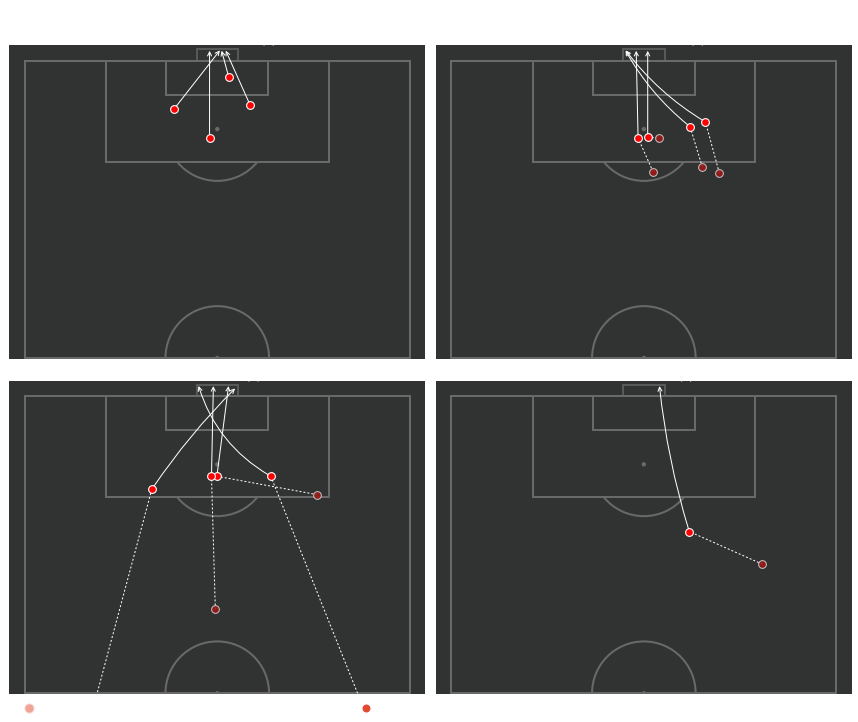

In [54]:
background = "#313332"
line = '#696969'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"
text_color = "#FFFFFF"
primary = "#F20505"

pitch = Pitch(figsize=(12,9.5),orientation='vertical',view='half',layout=(2, 2),goal_type='box',pitch_type='opta',
#               axis=True, label=True, tick=True,
              pitch_color=background, line_color=line,constrained_layout=False,pad_bottom=0.3)

fig, ax = pitch.draw()


#long-distance carries
x = eti.endX.values
y = eti.endY.values
xE = eti1.X.values
yE = eti1.Y.values
ax[2].scatter(yE,xE,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[2].scatter(y,x,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[2].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[2].annotate('', xy=([47,102]), xytext=([yE,xE]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))

xE = nic.endX.values
yE = nic.endY.values
x = nic1.X.values
y = nic1.Y.values
ax[2].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[2].scatter(yE,xE,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[2].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[2].annotate('', xy=([55,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2",lw=1,color=text_color))

xE = psg.endX.values
yE = psg.endY.values
x = psg1.X.values
y = psg1.Y.values
ax[2].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[2].scatter(yE,xE,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[2].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[2].annotate('', xy=([51,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))

xE = nim.endX.values
yE = nim.endY.values
x = nim1.X.values
y = nim1.Y.values
ax[2].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[2].scatter(yE,xE,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[2].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[2].annotate('', xy=([45,101.5]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.05",lw=1,color=text_color))



#one-touch

x = pepe_Saint.X.values
y = pepe_Saint.Y.values
ax[0].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[0].annotate('', xy=([49,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))

x = mon.X.values
y = mon.Y.values
ax[0].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[0].annotate('', xy=([48,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))

x = mar.X.values
y = mar.Y.values
ax[0].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[0].annotate('', xy=([52,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))

x = nime1.X.values
y = nime1.Y.values
ax[0].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[0].annotate('', xy=([49,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))


#two-touch
xE = pss1.endX.values
yE = pss1.endY.values
x = pss2.X.values
y = pss2.Y.values
ax[1].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[1].scatter(yE,xE,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[1].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[1].annotate('', xy=([52,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))

x = ami.endX.values
y = ami.endY.values
xE = ami2.X.values
yE = ami2.Y.values
ax[1].scatter(yE,xE,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[1].scatter(y,x,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[1].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[1].annotate('', xy=([49,102]), xytext=([yE,xE]), zorder=7, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))

xE = cae.endX.values
yE = cae.endY.values
x = cae1.X.values
y = cae1.Y.values
ax[1].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[1].scatter(yE,xE,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[1].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[1].annotate('', xy=([55,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.1",lw=1,color=text_color))

xE = lyo.endX.values
yE = lyo.endY.values
x = lyo2.X.values
y = lyo2.Y.values
ax[1].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[1].scatter(yE,xE,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[1].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[1].annotate('', xy=([55,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.1",lw=1,color=text_color))



#low block

xE = pan.endX.values
yE = pan.endY.values
x = pan1.X.values
y = pan1.Y.values
ax[3].scatter(y,x,color="red",edgecolors=text_color, s=60, linewidth=1.1, zorder=12, alpha=1)
ax[3].scatter(yE,xE,color="#981918",edgecolors='lightgrey', s=60, linewidth=1, zorder=12, alpha=0.9)
ax[3].plot((yE,y),(xE,x), zorder=7, ls="--",lw=1,dashes=(2, 2), color=text_color)
ax[3].annotate('', xy=([46,102]), xytext=([y,x]), zorder=7, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.05",lw=1,color=text_color))






# team='Arsenal'
# s = "{}"
# htext.fig_htext(s.format(team),0.03,0.88,highlight_colors=[primary], highlight_weights=["bold"],string_weight="bold",fontsize=24, fontfamily=title_font,color=text_color)
ax[2].text(50,103,"Solo finishes (4)",fontweight="regular", fontsize=12,fontfamily=title_font, color=text_color,ha="center")
ax[0].text(50,103,"First-time finishes (4)",fontweight="regular", fontsize=12,fontfamily=title_font, color=text_color,ha="center")
ax[1].text(50,103,"Two-touch finishes (4)",fontweight="regular", fontsize=12,fontfamily=title_font, color=text_color,ha="center")
ax[3].text(50,103,"Distance finish (1)",fontweight="regular", fontsize=12,fontfamily=title_font, color=text_color,ha="center")

# ax2 = fig.add_axes([0.93,0.855,0.06,0.06]) # badge
# ax2.axis("off")
# img = Image.open('./Arsenal.png')
# ax2.imshow(img)

ax3 = fig.add_axes([0.01,-0.01,0.05,0.02])
ax3.axis("off")
ax3.scatter([0.2],[-0.001],edgecolors=text_color, s=100, linewidth=2, zorder=12, alpha=0.5)
fig.text(0.05, -0.005, "start",fontsize=13, fontfamily=body_font, color=text_color)

ax5 = fig.add_axes([0.2,-0.01,0.05,0.02])
ax5.axis("off")
ax5.plot([0.3,0],[0.5,0.5],color=text_color,zorder=5, alpha=1, ls="--",lw=1,dashes=(4, 4))
fig.text(0.255, -0.005, "carry",fontsize=13, fontfamily=body_font, color=text_color)

ax4 = fig.add_axes([0.4,-0.01,0.05,0.02])
ax4.axis("off")
ax4.scatter([0.4],[0.05],edgecolors=text_color, s=100, linewidth=2, zorder=12, alpha=1)
fig.text(0.44, -0.005, "end",fontsize=13, fontfamily=body_font, color=text_color)

ax6 = fig.add_axes([0.6,-0.01,0.1,0.02])
ax6.axis("off")
ax6.annotate('', xy=([0.5,0.5]), xytext=([0,0.5]), zorder=5, arrowprops=dict(arrowstyle="->",lw=1,color=text_color))
# ax6.plot([0.5,0],[0.5,0.5],color=text_color,zorder=5, alpha=1, ls="->",lw=1)
fig.text(0.652, -0.005, "shot",fontsize=13, fontfamily=body_font, color=text_color)

# fig.text(0.02,1.04, "Nicolas Pépé", fontsize=25, fontfamily=body_font, color=text_color, fontweight='bold')
fig.text(0.02,1.01, "                    |                   | Season 2018/2019 | Non-penalty goals",fontsize=14, fontfamily=body_font, color=text_color,zorder=2)
fig.text(0.877, -0.005, "@jonollington",fontsize=12, fontfamily=body_font, color=text_color)

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("pepe_goal-type",bbox_inches="tight",dpi=200);